In [265]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("diabetes_data.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [266]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [267]:
df.shape

(520, 17)

In [268]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [269]:
label_encoder=LabelEncoder()

In [270]:
print(label_encoder)

LabelEncoder()


In [271]:
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Polyuria"]=label_encoder.fit_transform(df["Polyuria"])
df["Polydipsia"]=label_encoder.fit_transform(df["Polydipsia"])
df["sudden weight loss"]=label_encoder.fit_transform(df["sudden weight loss"])
df["weakness"]=label_encoder.fit_transform(df["weakness"])
df["Polyphagia"]=label_encoder.fit_transform(df["Polyphagia"])
df["Genital thrush"]=label_encoder.fit_transform(df["Genital thrush"])
df["visual blurring"]=label_encoder.fit_transform(df["visual blurring"])
df["Itching"]=label_encoder.fit_transform(df["Itching"])
df["Irritability"]=label_encoder.fit_transform(df["Irritability"])
df["delayed healing"]=label_encoder.fit_transform(df["delayed healing"])
df["partial paresis"]=label_encoder.fit_transform(df["partial paresis"])
df["muscle stiffness"]=label_encoder.fit_transform(df["muscle stiffness"])
df["Alopecia"]=label_encoder.fit_transform(df["Alopecia"])
df["Obesity"]=label_encoder.fit_transform(df["Obesity"])
df["class"]=label_encoder.fit_transform(df["class"])
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [272]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [273]:
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

In [274]:
df.groupby('class').mean()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
class,,,,,,,,,,,,,,,,
0,46.360000,0.905000,0.075000,0.040000,0.1450,0.43500,0.240000,0.165000,0.290000,0.49500,0.08000,0.430000,0.16,0.300000,0.50500,0.135000
1,49.071875,0.459375,0.759375,0.703125,0.5875,0.68125,0.590625,0.259375,0.546875,0.48125,0.34375,0.478125,0.60,0.421875,0.24375,0.190625


In [275]:
#separating the datas and labels
x= df.drop(columns="class",axis=1)
y=df["class"]

In [276]:
print(x)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

In [277]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32


In [278]:
scaler=StandardScaler()

In [279]:
scaler.fit(x)

StandardScaler()

In [280]:
standardized_data = scaler.transform(x)

In [281]:
print(standardized_data)

[[-0.6613669   0.76509206 -0.99233705 ...  1.29099445  1.38022749
   2.21564684]
 [ 0.82136224  0.76509206 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.57899306  0.76509206  1.00772212 ...  1.29099445  1.38022749
  -0.45133547]
 ...
 [ 0.82136224 -1.30703226  1.00772212 ...  1.29099445 -0.72451824
   2.21564684]
 [-1.32035762 -1.30703226 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.49661921  0.76509206 -0.99233705 ... -0.77459667 -0.72451824
  -0.45133547]]


In [282]:
 x=standardized_data
 y=df["class"]

In [283]:
print(x)

[[-0.6613669   0.76509206 -0.99233705 ...  1.29099445  1.38022749
   2.21564684]
 [ 0.82136224  0.76509206 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.57899306  0.76509206  1.00772212 ...  1.29099445  1.38022749
  -0.45133547]
 ...
 [ 0.82136224 -1.30703226  1.00772212 ...  1.29099445 -0.72451824
   2.21564684]
 [-1.32035762 -1.30703226 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.49661921  0.76509206 -0.99233705 ... -0.77459667 -0.72451824
  -0.45133547]]


In [284]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32


In [285]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=2)

In [286]:
print(x.shape,x_train.shape,x_test.shape) 

(520, 16) (364, 16) (156, 16)


In [287]:
classifier=svm.SVC(kernel='linear')

In [288]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [289]:
# accuracy_score of training data

x_train_prediction=classifier.predict(x_train)
training_data_accuracy_score=accuracy_score(y_train,x_train_prediction)
print(f"Accuracy Score of training data : {training_data_accuracy_score * 100} %")

Accuracy Score of training data : 92.85714285714286 %


In [290]:
# accuracy_score of testing data

x_test_prediction=classifier.predict(x_test)
testing_data_accuracy_score=accuracy_score(y_test,x_test_prediction)
print(f"Accuracy Score of testing data : {testing_data_accuracy_score * 100} %")

Accuracy Score of testing data : 92.3076923076923 %


In [291]:
input_data = (72,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

print(f"Predicted Value: {prediction}")
if(prediction[0]==0):
    print("This person is Non-Diabetic")
else:
    print("This person is Diabetic")


[[1.97459601 0.76509206 1.00772212 1.10984668 1.18165704 0.83959397
  1.09274555 1.86621505 1.10984668 1.02729546 1.76832806 1.08431186
  1.14953407 1.29099445 1.38022749 2.21564684]]
[1]
Predicted Value: [1]
This person is Diabetic


C:\Users\neran\anaconda3\jnotebook\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [292]:
cm = confusion_matrix(y_test, x_test_prediction)
print(cm)

[[51  9]
 [ 3 93]]


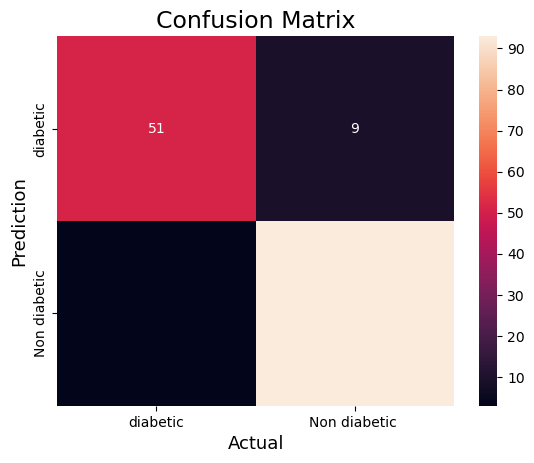

In [293]:
sns.heatmap(cm,annot=True,
            fmt='g', 
            xticklabels=['diabetic','Non diabetic '],
            yticklabels=['diabetic','Non diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [294]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, x_test_prediction)

print("Accuracy:", accuracy)

Accuracy: 0.9230769230769231


In [295]:
miss_rate = (cm[1][0]) / (cm[1][1] + cm[1][0])

print("Miss rate:", miss_rate)

Miss rate: 0.03125


In [296]:
from sklearn.metrics import f1_score
y_pred = classifier.predict(x_test)
f1score = f1_score(y_test, y_pred)
print("F1 Score:", f1score)

F1 Score: 0.9393939393939394


In [297]:
from sklearn.metrics import recall_score
y_pred = classifier.predict(x_test)
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

Sensitivity: 0.96875


In [298]:
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.85


In [299]:
from sklearn.metrics import precision_score
y_pred = classifier.predict(x_test)
ppv = precision_score(y_test, y_pred)
print("Positive Predictive Value (Precision):", ppv)

Positive Predictive Value (Precision): 0.9117647058823529


In [300]:
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("Negative Predictive Value:", npv)

Negative Predictive Value: 0.9444444444444444


In [301]:
fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0])

print("False Positive rate:", fpr)

False Positive rate: 0.15


In [302]:
fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])

print("False Negative rate:", fnr)

False Negative rate: 0.03125


In [303]:
false_negatives = cm[1, 0]
total_actual_positives = cm[1, 0] + cm[1, 1]

# Calculate miss rate percentage
miss_rate_percentage = (false_negatives / total_actual_positives) * 100

print("Miss Rate Percentage:", miss_rate_percentage)

Miss Rate Percentage: 3.125


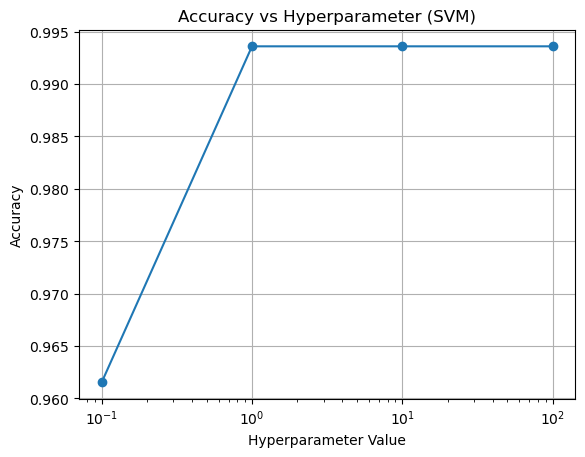

In [304]:
# Define values of hyperparameter (e.g., C)
hyperparameters = [0.1, 1, 10, 100]

# Initialize list to store accuracy scores
accuracies = []

# Train SVM classifier for each value of hyperparameter
for C in hyperparameters:
    svm = SVC(C=C)
    svm.fit(x_train, y_train)
    accuracy = svm.score(x_test, y_test)
    accuracies.append(accuracy)

# Plot accuracy versus hyperparameter value
plt.figure()
plt.plot(hyperparameters, accuracies, marker='o')
plt.title('Accuracy vs Hyperparameter (SVM)')
plt.xlabel('Hyperparameter Value')
plt.ylabel('Accuracy')
plt.xscale('log')  # Log scale for better visualization if hyperparameters are on a large scale
plt.grid(True)
plt.show()

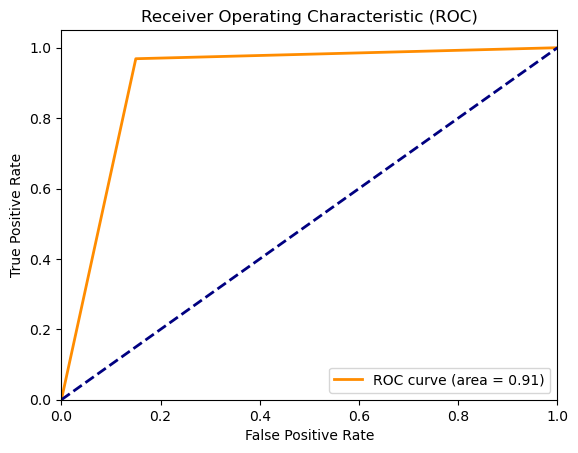

In [305]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the MLP classifier
mlp_clf.fit(x_train, y_train)

# Predict on the test set
y_pred = mlp_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9935897435897436


In [307]:
x_train_prediction=mlp_clf.predict(x_train)
training_data_accuracy_score=accuracy_score(y_test,y_pred)
print(f"Accuracy Score of training data : {training_data_accuracy_score * 100} %")

Accuracy Score of training data : 99.35897435897436 %


In [308]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[59  1]
 [ 0 96]]


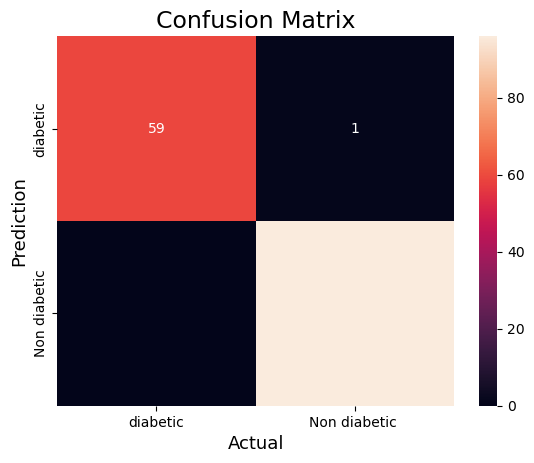

In [309]:
sns.heatmap(cm1,annot=True,
            fmt='g', 
            xticklabels=['diabetic','Non diabetic '],
            yticklabels=['diabetic','Non diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [310]:
miss_rate = (cm1[1][0]) / (cm1[1][1] + cm1[1][0])

print("Miss rate:", miss_rate)

Miss rate: 0.0


In [311]:

from sklearn.metrics import f1_score
y_pred = mlp_clf.predict(x_test)
f1score = f1_score(y_test, y_pred)
print("F1 Score:", f1score)

F1 Score: 0.9948186528497409


In [312]:
from sklearn.metrics import recall_score
y_pred = mlp_clf.predict(x_test)
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

Sensitivity: 1.0


In [313]:
specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])

print("Specificity:", specificity)

Specificity: 0.9833333333333333


In [314]:
from sklearn.metrics import precision_score
y_pred = mlp_clf.predict(x_test)
ppv = precision_score(y_test, y_pred)
print("Positive Predictive Value (Precision):", ppv)

Positive Predictive Value (Precision): 0.9896907216494846


In [315]:
npv = cm1[0, 0] / (cm1[0, 0] + cm1[1, 0])

print("Negative Predictive Value:", npv)

Negative Predictive Value: 1.0


In [316]:
fpr = cm1[0, 1] / (cm1[0, 1] + cm1[0, 0])

print("False Positive rate:", fpr)

False Positive rate: 0.016666666666666666


In [317]:
fnr = cm1[1, 0] / (cm1[1, 0] + cm1[1, 1])

print("False Negative rate:", fnr)

False Negative rate: 0.0


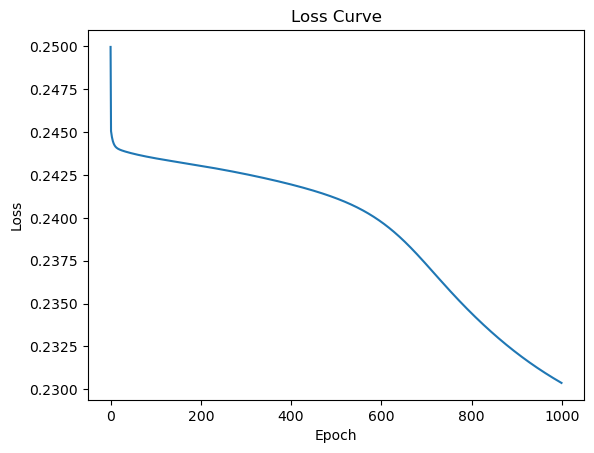

In [318]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=100)

# Initialize weights and biases
input_size = 2
hidden_size = 3
output_size = 1
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Define learning rate and number of epochs
learning_rate = 0.1
num_epochs = 1000

# Training loop
losses = []
for epoch in range(num_epochs):
    # Forward pass
    hidden_output = sigmoid(np.dot(X, W1) + b1)
    output = sigmoid(np.dot(hidden_output, W2) + b2)
    
    # Calculate loss (mean squared error)
    loss = np.mean((output - y.reshape(-1, 1)) ** 2)
    losses.append(loss)
    
    # Backpropagation
    output_error = output - y.reshape(-1, 1)
    output_delta = output_error * output * (1 - output)
    hidden_error = np.dot(output_delta, W2.T)
    hidden_delta = hidden_error * hidden_output * (1 - hidden_output)
    
    # Update weights and biases
    W2 -= learning_rate * np.dot(hidden_output.T, output_delta)
    b2 -= learning_rate * np.sum(output_delta, axis=0)
    W1 -= learning_rate * np.dot(X.T, hidden_delta)
    b1 -= learning_rate * np.sum(hidden_delta, axis=0)

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

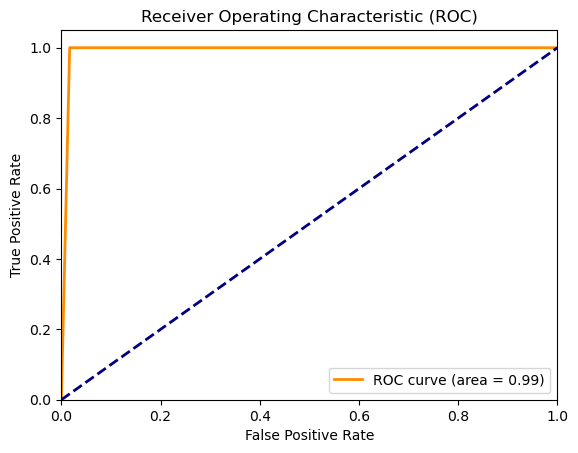

In [319]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [320]:
from sklearn.svm import SVC  # Importing SVC class from sklearn.svm module

# Initialize the SVM classifier with probability=True
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the SVM classifier
svm.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [321]:
from sklearn.calibration import CalibratedClassifierCV  # Importing CalibratedClassifierCV class from sklearn.calibration module

# Wrap the SVM classifier with CalibratedClassifierCV
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid')

# Train the calibrated SVM classifier
calibrated_svm.fit(x_train, y_train)

CalibratedClassifierCV(estimator=SVC(probability=True, random_state=42))

In [322]:

# Initialize the SVM classifier with probability=True
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the SVM classifier
svm.fit(x_train, y_train)

# Wrap the SVM classifier with CalibratedClassifierCV
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid')

# Train the calibrated SVM classifier
calibrated_svm.fit(x_train, y_train)

# Initialize the ANN classifier
ann = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the ANN classifier
ann.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [323]:
# fusion
import numpy as np
pb_mlp = mlp_clf.predict_proba(x_test)
pb_svm = svm.predict_proba(x_test)

a= np.mean(pb_mlp)
b= np.mean(pb_svm)

w1 = a/(a+b)
w2 = b/(a+b)

In [324]:
inp_data = x_test[:1,:]
pb1 = mlp_clf.predict_proba(inp_data)
pb2 = svm.predict_proba(inp_data)
pb = w1*pb1+ w2*pb2

d_class = np.argmax(pb)
if d_class==1:
  print('Positive')
else:
  print('Negative')

Positive


In [325]:
import numpy as np

# Convert y_test to a NumPy array if it's a Pandas Series or DataFrame
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# Initialize variables to count correct predictions
correct_predictions = 0
total_samples = len(x_test)

# Loop through each sample in the test data
for i in range(total_samples):
    inp_data = x_test[i:i+1, :]
    pb1 = mlp_clf.predict_proba(inp_data)
    pb2 = svm.predict_proba(inp_data)
    
    pb = w1 * pb1 + w2 * pb2
    predicted_class = np.argmax(pb)
    
    # Compare predicted class with true class label
    if predicted_class == y_test_array[i]:  # Assuming y_test contains true class labels
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_samples
print("Accuracy:", accuracy)
print(f"Accuracy in percentage : {accuracy * 100} %")

Accuracy: 0.9935897435897436
Accuracy in percentage : 99.35897435897436 %


In [326]:
from sklearn.metrics import confusion_matrix,accuracy_score
total_samples = len(x_test)
pred=[]
# Loop through each sample in the test data
for i in range(total_samples):
    inp_data = x_test[i:i+1, :]
    pb1 = mlp_clf.predict_proba(inp_data)
    pb2 = svm.predict_proba(inp_data)
    
    pb = w1 * pb1 + w2 * pb2
    np.array(pb)
    predicted_class = np.argmax(pb)
    pred.append(predicted_class)
accuracy_score(y_test_array,pred)

0.9935897435897436

59


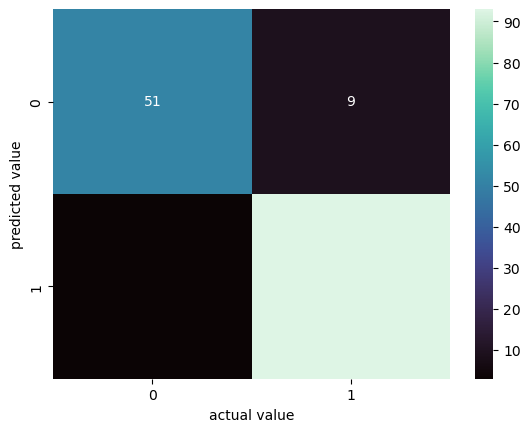

In [327]:
import seaborn as sns
import pandas as pd
cm2=confusion_matrix(y_test_array,pred)
cm2=pd.DataFrame(cm2)
print(cm2[0][0])
sns.heatmap(cm,annot=True,fmt='d',cmap='mako')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [328]:
miss_rate = (cm2[1][0]) / (cm2[1][1] + cm2[1][0])

print("Miss rate:", miss_rate)

Miss rate: 0.010309278350515464


In [329]:
from sklearn.metrics import recall_score
#y_pred = pb.predict(x_test)
sensitivity = recall_score(y_test_array, pred)
print("Sensitivity:", sensitivity)

Sensitivity: 1.0


In [330]:
specificity = cm2[0][ 0] / (cm2[0][ 0] + cm2[0][1])

print("Specificity:", specificity)

Specificity: 1.0


In [331]:
from sklearn.metrics import precision_score
#y_pred = pb.predict(x_test)
ppv = precision_score(y_test_array, pred)
print("Positive Predictive Value (Precision):", ppv)

Positive Predictive Value (Precision): 0.9896907216494846


In [332]:
npv = cm2[0][ 0] / (cm2[0][0] + cm2[1][ 0])

print("Negative Predictive Value:", npv)

Negative Predictive Value: 0.9833333333333333


In [333]:
fpr = cm2[0][ 1] / (cm2[0][1] + cm2[0][0])

print("False Positive rate:", fpr)

False Positive rate: 0.0


In [334]:
fnr = cm2[1] [0] / (cm2[1][ 0] + cm2[1][ 1])

print("False Negative rate:", fnr)

False Negative rate: 0.010309278350515464


In [335]:
from sklearn.metrics import f1_score
#y_pred = pb.predict(x_test)
f1score = f1_score(y_test_array, y_pred)
print("F1 Score:", f1score)

F1 Score: 0.9948186528497409


Fusion Accuracy: 0.9935897435897436


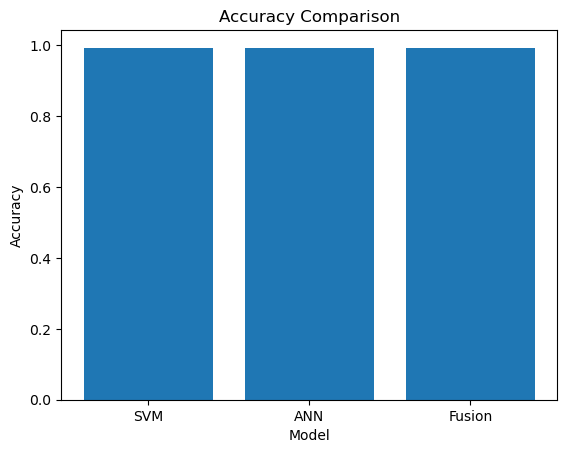

In [339]:
# Get predictions from both classifiers
svm_preds = svm.predict(x_test)
ann_preds = ann.predict(x_test)

# Fusion: Simple majority voting
fusion_preds = np.round((svm_preds + ann_preds) / 2)

# Calculate accuracy for fusion model
fusion_accuracy = accuracy_score(y_test, fusion_preds)
print("Fusion Accuracy:", fusion_accuracy)

# Plot accuracy
plt.bar(['SVM', 'ANN', 'Fusion'], [svm.score(x_test, y_test), ann.score(x_test, y_test), fusion_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

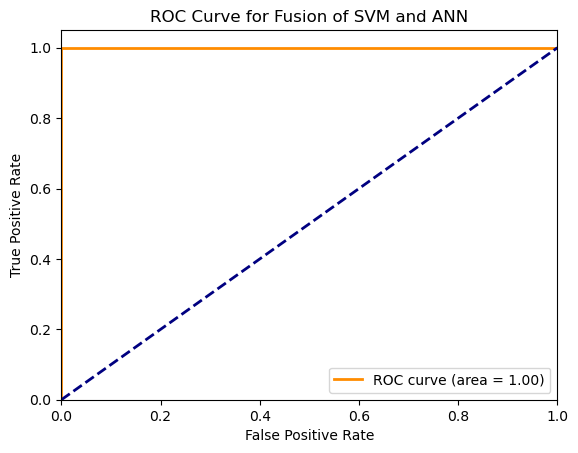

In [336]:
# Get probabilities from both classifiers
svm_probs = svm.predict_proba(x_test)[:, 1]
ann_probs = ann.predict_proba(x_test)[:, 1]

# Fusion: Simple averaging of probabilities
fusion_probs = (svm_probs + ann_probs) / 2

# Calculate ROC curve and AUC for fusion model
fpr, tpr, _ = roc_curve(y_test, fusion_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fusion of SVM and ANN')
plt.legend(loc="lower right")
plt.show()